## Basic mathematic of creating a packed hexagonal lattice 

In [19]:
import math

# Given center-to-center distance (horizontal distance between centers for flat-topped hexes)
center_to_center_distance = 5.4  # in mm

# Calculate the side length
side_length = center_to_center_distance / 1.5
print("Side length of each hexagon:", side_length, "mm")

# Calculate the area of the hexagon
area = (3 * math.sqrt(3) / 2) * side_length ** 2
print("Area of each hexagon in a flat-topped lattice:", area, "mm²")


Side length of each hexagon: 3.6 mm
Area of each hexagon in a flat-topped lattice: 33.67106769913898 mm²


In [20]:
# Given vertical center-to-center distance between pointy-topped hexagons
# These are closer to our honeycomb paper measurements

side_length = center_to_center_distance / math.sqrt(3)
print("Side length of each hexagon:", side_length, "mm")

# Calculate the area of the hexagon
area = (3 * math.sqrt(3) / 2) * side_length ** 2
print("Area of each hexagon in a pointy-topped lattice:", area, "mm²")


Side length of each hexagon: 3.1176914536239795 mm
Area of each hexagon in a pointy-topped lattice: 25.253300774354237 mm²


## Visualizing a hexagonal lattice

<Figure size 960x960 with 0 Axes>

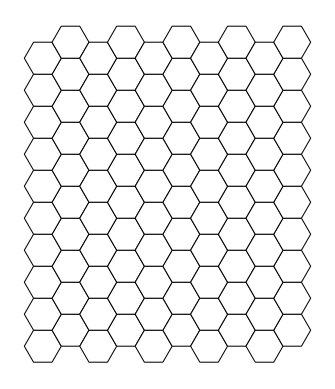

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(12, 12), dpi=80)# Parameters
X = 25.25
hexagon_area = 0.75 * X

side_length = np.sqrt(2 * np.sqrt(3) * hexagon_area / 9)  # Calculate the side length based on the desired hexagon area
wall_thickness = 0.73  # Thickness of the lattice walls in millimeters

# Create a figure and axis
fig, ax = plt.subplots()

# Function to calculate hexagon vertices
def hexagon(x_center, y_center, side_length):
    angle = np.linspace(0, 2*np.pi, 7)
    x_hex = x_center + side_length * np.cos(angle)
    y_hex = y_center + side_length * np.sin(angle)
    return x_hex, y_hex

# Plot the lattice
num_rows = 10
num_cols = 10
for i in range(num_rows):
    for j in range(num_cols):
        y_shift = 0 if j % 2 == 0 else side_length * np.sqrt(3) / 2
        x_hex, y_hex = hexagon(j * 3/2 * side_length, i * np.sqrt(3) * side_length + y_shift, side_length)
        ax.fill(x_hex, y_hex, 'w', edgecolor='k', linewidth=wall_thickness)

ax.set_aspect('equal')
ax.axis('off')
plt.show()




## Overlaying lattices of different cell sizes

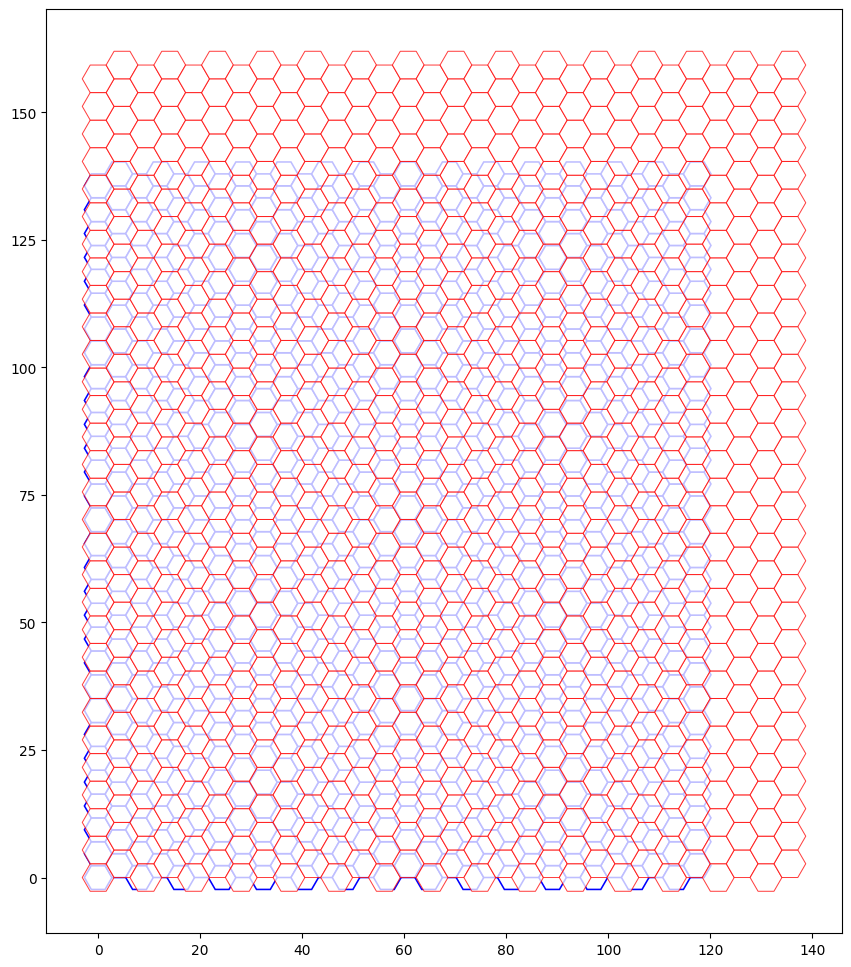

In [3]:
# Parameters for the bottom lattice
bottom_hexagon_area = 25.25 * 0.75
bottom_side_length = np.sqrt(2 * np.sqrt(3) * bottom_hexagon_area / 9)
bottom_wall_thickness = 1.145

# Parameters for the top lattice
top_hexagon_area = 25.25
top_side_length = np.sqrt(2 * np.sqrt(3) * top_hexagon_area / 9)
top_wall_thickness = 0.73

# Create a figure and axis with a larger size
fig, ax = plt.subplots(figsize=(12, 12)) 

# Function to calculate hexagon vertices
def hexagon(x_center, y_center, side_length):
    angle = np.linspace(0, 2*np.pi, 7)
    x_hex = x_center + side_length * np.cos(angle)
    y_hex = y_center + side_length * np.sin(angle)
    return x_hex, y_hex

# Plot the bottom lattice
num_rows = 30
num_cols = 30
for i in range(num_rows):
    for j in range(num_cols):
        y_shift = 0 if j % 2 == 0 else bottom_side_length * np.sqrt(3) / 2
        x_hex, y_hex = hexagon(j * 3/2 * bottom_side_length, i * np.sqrt(3) * bottom_side_length + y_shift, bottom_side_length)
        edge_color = 'b'  # Set edge color based on lattice position
        ax.fill(x_hex, y_hex, 'w', edgecolor=edge_color, linewidth=bottom_wall_thickness)

# Plot the top lattice
for i in range(num_rows):
    for j in range(num_cols):
        y_shift = 0 if j % 2 == 0 else top_side_length * np.sqrt(3) / 2
        x_hex, y_hex = hexagon(j * 3/2 * top_side_length, i * np.sqrt(3) * top_side_length + y_shift, top_side_length)
        ax.fill(x_hex, y_hex, 'w', edgecolor='r', linewidth=top_wall_thickness, alpha = 0.75)

#ax.legend(labels = ['0.75x', '1x'])
ax.set_aspect('equal')

plt.show()


# 

## Using hexalattice package from https://github.com/alexkaz2/hexalattice

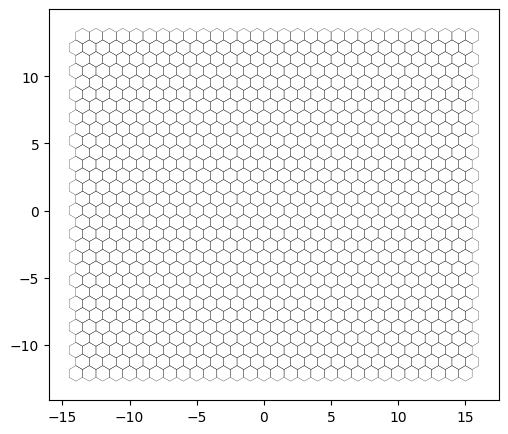

In [10]:
from hexalattice.hexalattice import *

hex_centers, _ = create_hex_grid(nx=30, ny=30, do_plot=True)

(array([[-2.5       , -2.59807621],
        [-1.5       , -2.59807621],
        [-0.5       , -2.59807621],
        [ 0.5       , -2.59807621],
        [ 1.5       , -2.59807621],
        [-2.        , -1.73205081],
        [-1.        , -1.73205081],
        [ 0.        , -1.73205081],
        [ 1.        , -1.73205081],
        [ 2.        , -1.73205081],
        [-2.5       , -0.8660254 ],
        [-1.5       , -0.8660254 ],
        [-0.5       , -0.8660254 ],
        [ 0.5       , -0.8660254 ],
        [ 1.5       , -0.8660254 ],
        [-2.        ,  0.        ],
        [-1.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 1.        ,  0.        ],
        [ 2.        ,  0.        ],
        [-2.5       ,  0.8660254 ],
        [-1.5       ,  0.8660254 ],
        [-0.5       ,  0.8660254 ],
        [ 0.5       ,  0.8660254 ],
        [ 1.5       ,  0.8660254 ],
        [-2.        ,  1.73205081],
        [-1.        ,  1.73205081],
        [ 0.        ,  1.732

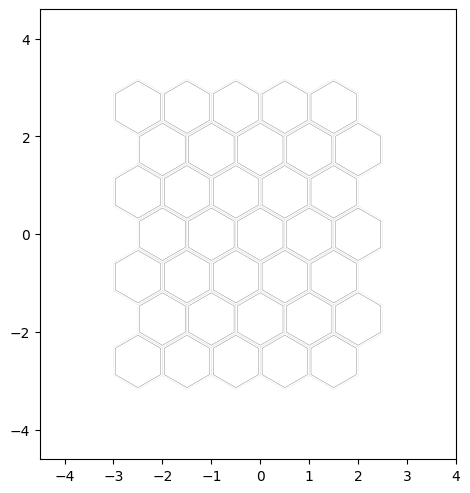

In [11]:
_, h_ax = create_hex_grid(nx=5, ny=7, do_plot=True, edge_color=(0.85, 0.85, 0.85))
                                    
create_hex_grid(nx=5, ny=7, do_plot=True, edge_color=(0.25,0.25, 0.25), h_ax=h_ax, plotting_gap=0.145/2)

(array([[-25.72017085, -18.61378015],
        [-24.72397615, -18.70093589],
        [-23.72778145, -18.78809164],
        ...,
        [ 25.29755259,  19.52008794],
        [ 26.29374729,  19.43293219],
        [ 27.28994198,  19.34577645]]),
 <Axes: >)

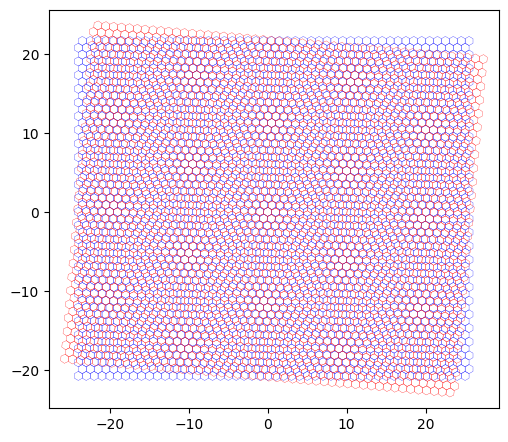

In [6]:
## Moiré pattern

# wiht same size hexagons and 5 deg  tilt

hex_grid1, h_ax = create_hex_grid(nx=50,
                              ny=50,
                              rotate_deg=0,
                              min_diam=1,
                              edge_color='b',
                              do_plot=True)
create_hex_grid(nx=50,
                ny=50,
                min_diam=1,
                rotate_deg=5,
                edge_color='r',
                do_plot=True,
                h_ax=h_ax)

(array([[-75.6       , -65.47152053],
        [-70.2       , -65.47152053],
        [-64.8       , -65.47152053],
        ...,
        [ 72.9       ,  70.14805771],
        [ 78.3       ,  70.14805771],
        [ 83.7       ,  70.14805771]]),
 <Axes: >)

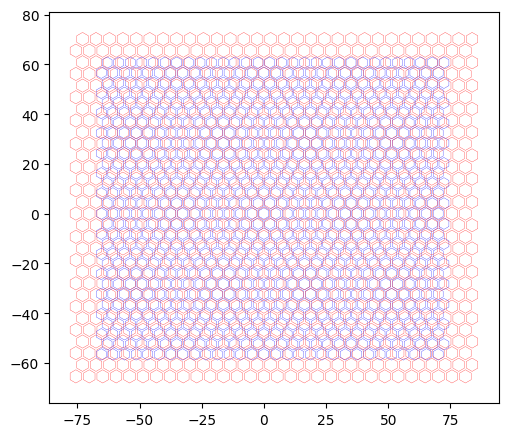

In [7]:


hex_grid1, h_ax = create_hex_grid(nx=30,
                                  ny=30,
                                  rotate_deg=0,
                                  min_diam=4.67 ,
                                  plotting_gap = 0.145,
                                  edge_color='b',
                                  do_plot=True)
create_hex_grid(nx=30,
                ny=30,
                min_diam=5.4,
                rotate_deg=0,
                plotting_gap=0.145,
                edge_color='r',
                do_plot=True,            
                h_ax=h_ax)


(array([[-81.01853818, -58.63340747],
        [-75.63908681, -59.10404848],
        [-70.25963544, -59.57468949],
        ...,
        [ 78.73639956,  63.52746952],
        [ 84.11585093,  63.05682851],
        [ 89.4953023 ,  62.5861875 ]]),
 <Axes: >)

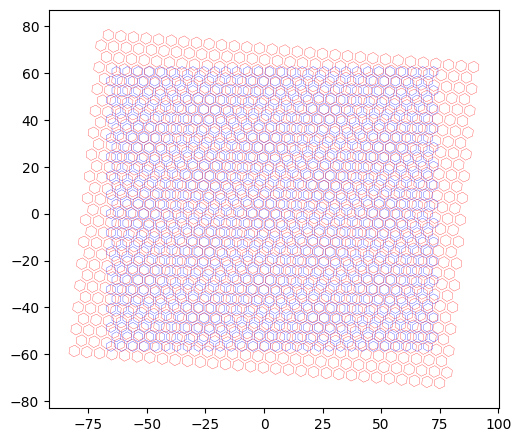

In [8]:
## Moiré pattern

hex_grid1, h_ax = create_hex_grid(nx=30,
                                  ny=30,
                                  rotate_deg=0,
                                  min_diam=4.67 ,
                                  plotting_gap = 0.2,
                                  edge_color='b',
                                  do_plot=True)
create_hex_grid(nx=30,
                ny=30,
                min_diam=5.4,
                rotate_deg=5,
                plotting_gap=0.2,
                edge_color='r',
                do_plot=True,            
                h_ax=h_ax)
